In [1]:
import numpy as np
import matplotlib.pyplot as plt

total = 100
data = np.random.normal(loc=0.0, scale=1, size=total)  #创建total个生成正态分布的概率密度随机数
print(data[:10])

[ 0.54807471 -0.71556693  0.09993832 -0.50827958  0.83365126 -0.69474219
  0.49109422 -0.76958652 -1.40879168 -0.02649159]


In [4]:
counter = []  #计数落在区间内的随机数个数
for i in range(11):
    counter.append(0)
tick_label = []  #区间对应的下标

for pointer in range(len(counter)):   #循环筛选
    tick_label.append(-0.25+0.5*(pointer-5))
    for i in data:
        if i<=0.25+0.5*(pointer-5) and i>-0.25+0.5*(pointer-5):
            counter[pointer] += 1
print('counter: {}'.format(counter))
print(tick_label)

counter: [1, 0, 3, 15, 28, 19, 12, 15, 5, 1, 0]
[-2.75, -2.25, -1.75, -1.25, -0.75, -0.25, 0.25, 0.75, 1.25, 1.75, 2.25]


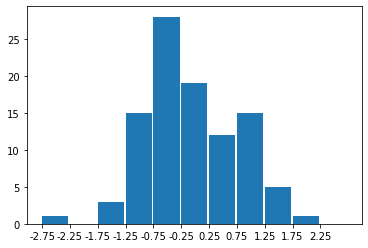

In [7]:
plt.figure()
figure_bar = plt.bar(range(len(counter)), counter, width=0.94, tick_label= tick_label, align='edge') #画柱状图
plt.savefig('bar.png')  #保存图像
plt.show()


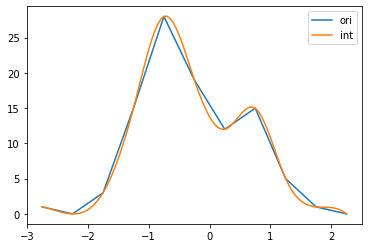

In [8]:
from scipy.interpolate import interp1d

f2 = interp1d(tick_label, counter, kind='cubic') #一维插值算法
x = np.linspace(-2.75, 2.25, num=101, endpoint=True) #新建-2.75~2.25间的101个值

plt.figure()
figure_plot = plt.plot(tick_label, counter) #画第一组折线图
figure_plot_in = plt.plot(x, f2(x)) #使用插值计算出对应的y，并画第二组折线图
plt.legend((figure_plot[0],figure_plot_in[0]),('ori','int'))
plt.savefig('plot.png')  #保存图像
plt.show()

In [9]:
data_dict = {}
if data_dict.get('bar_chart') == None: #如果data_dict字典中没有'bar_chart'的Key
    data_dict['bar_chart'] = {'x': range(len(counter)),
                             'y': counter,
                             'figure': 'bar.png'}
else:
    print('already occupied')
    
if not('y' in data_dict['bar_chart']):  #如果data_dict字典中bar_chart对应的Key中没有'y'
    data_dict['bar_chart']['y'] = counter
else:
    print('already have y')
    
print(data_dict)

already have y
{'bar_chart': {'x': range(0, 11), 'y': [1, 0, 3, 15, 28, 19, 12, 15, 5, 1, 0], 'figure': 'bar.png'}}


In [10]:
try:
    fig = data_dict.get('plot_chart').get('figure')
    print(fig)
except:
    print('output error')
    
try:
    fig = data_dict.get('bar_chart').get('figure')
    print(fig)
except:
    print('output error2')

output error
bar.png
